In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head(3)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, stratify=target, random_state=42)

In [5]:
print(X_train.shape, X_test.shape)

(5197, 3) (1300, 3)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_scaled, y_train)
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.7829517029055224
0.7761538461538462


In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]


## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9978833942659227
0.8653846153846154


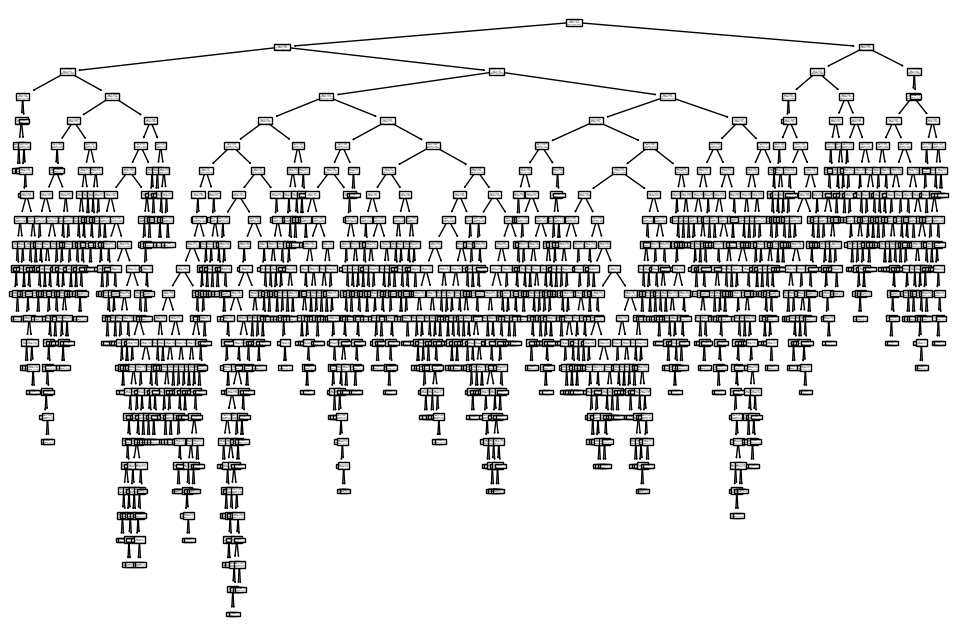

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt)
plt.show()

왼쪽이 Yes, 오른쪽이 No\
지니 불순도: 1 - { ∑ (클래스 비율)² } => [0, 0.5]\
엔트로피 불순도: -음성비율 * log2(음성비율) - 양성비율 * log2(양성비율)

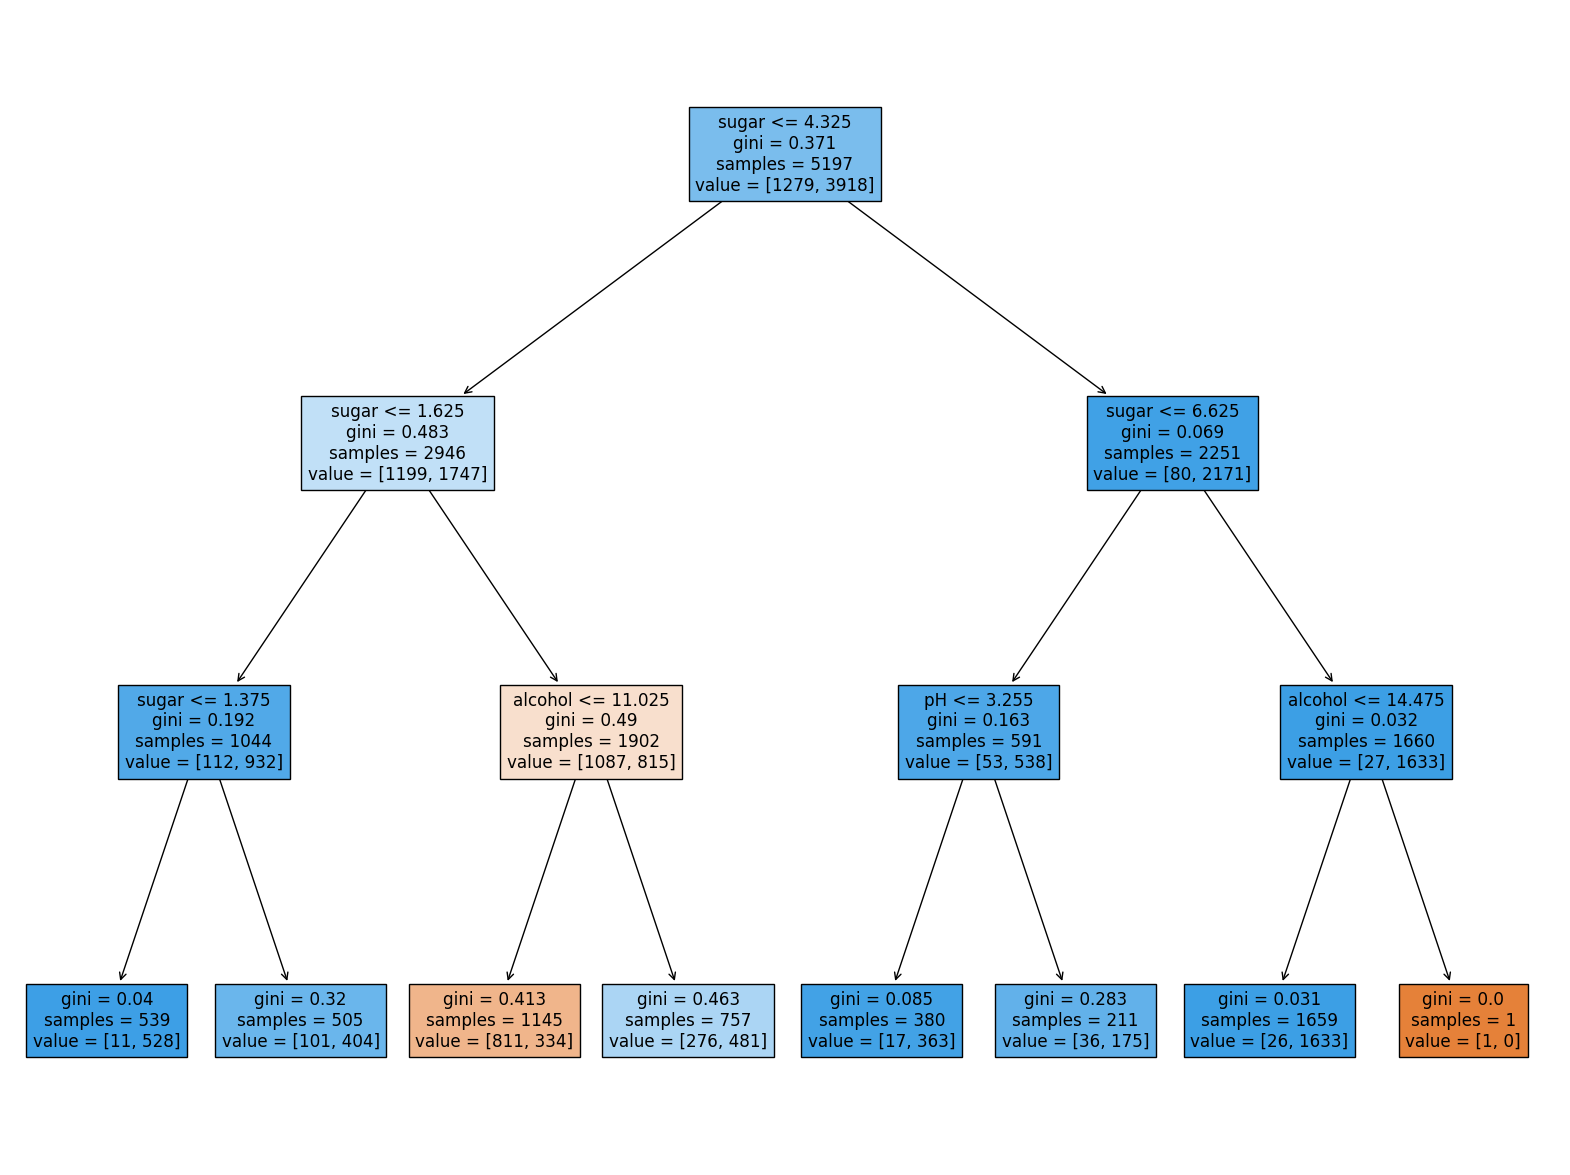

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

<Axes: >

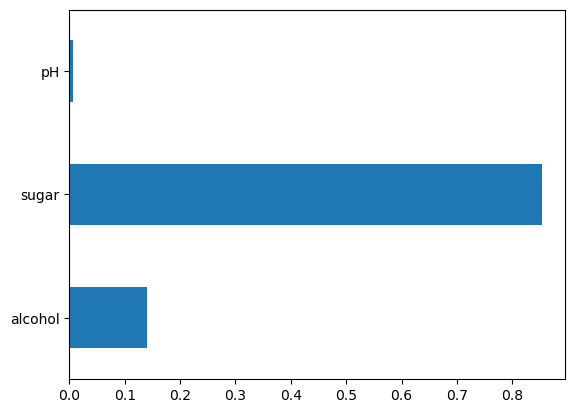

In [16]:
feat_importances = pd.Series(dt.feature_importances_, index=['alcohol', 'sugar', 'pH'])
feat_importances.plot(kind='barh')